In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
dataset = '/content/drive/MyDrive/Prak Big Data Analytics/Responsi/diabetes.csv'

In [3]:
df = pd.read_csv(dataset, sep=';')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df_input = df.drop('Outcome', axis=1)
df_input.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
scaler = StandardScaler()
scaler.fit(df_input)

StandardScaler()

In [8]:
data_normalize = scaler.transform(df_input)

In [9]:
pca = PCA(n_components=2)
pca.fit(data_normalize)

PCA(n_components=2)

In [10]:
x_pca = pca.transform(data_normalize)

Text(0, 0.5, 'Second Principal Component')

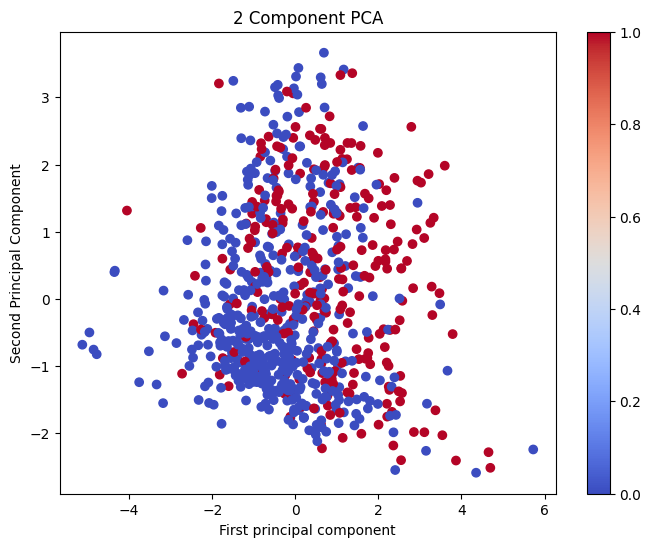

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df["Outcome"],cmap='coolwarm')
plt.colorbar()
plt.title('2 Component PCA')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [12]:
pca.components_

array([[ 0.1284321 ,  0.39308257,  0.36000261,  0.43982428,  0.43502617,
         0.45194134,  0.27061144,  0.19802707],
       [ 0.59378583,  0.17402908,  0.18389207, -0.33196534, -0.25078106,
        -0.1009598 , -0.122069  ,  0.62058853]])

In [13]:
df_comp = pd.DataFrame(pca.components_, columns=df_input.columns)

<Axes: >

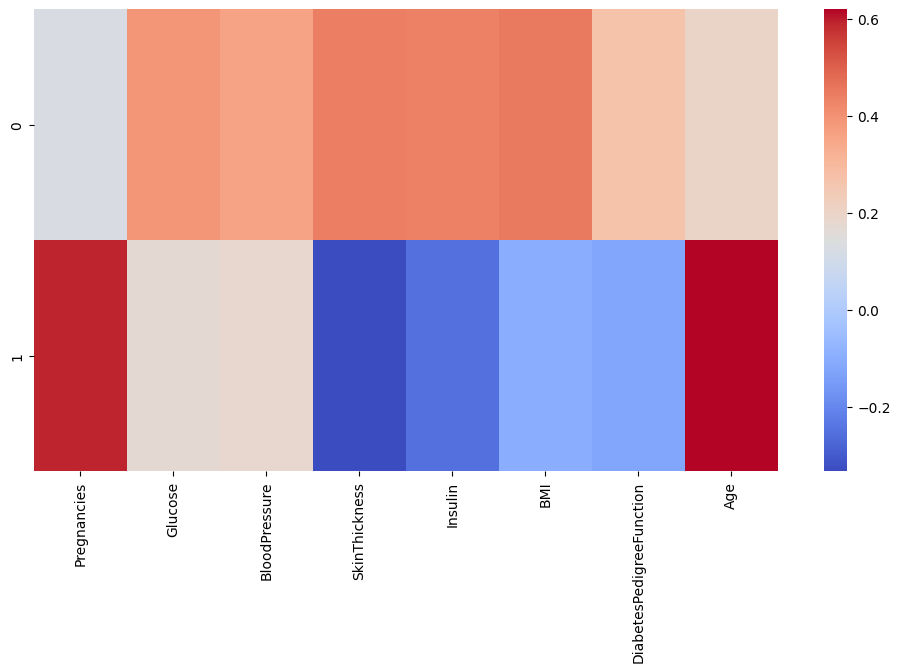

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='coolwarm')

In [23]:
# Melihat kontribusi setiap fitur
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio of each component:\n", explained_variance)
print("Principal Components:\n", df_comp)

Explained Variance Ratio of each component:
 [0.26179749 0.21640127]
Principal Components:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.128432  0.393083       0.360003       0.439824  0.435026  0.451941   
1     0.593786  0.174029       0.183892      -0.331965 -0.250781 -0.100960   

   DiabetesPedigreeFunction       Age  
0                  0.270611  0.198027  
1                 -0.122069  0.620589  


In [30]:
# Memilih fitur yang telah diidentifikasi dari PCA
selected_features = ['BMI', 'SkinThickness', 'Insulin', 'Glucose']
X_selected = df[selected_features]
y = df['Outcome']

In [31]:
# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [32]:
# Membagi data ke dalam train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
# Melakukan klasifikasi menggunakan Naïve Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.7727272727272727
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



# Naive Bayes Classifier

In [20]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x_pca, df['Outcome'], test_size=0.2, random_state=42)

In [21]:
#model = GaussianNB()
#model.fit(x_train, y_train)

In [22]:
#y_pred = model.predict(x_test)
#accuracy = model.score(x_test, y_test)
#print("Accuracy:", accuracy)
#print(confusion_matrix(y_pred, y_test))
#print(classification_report(y_pred, y_test))